In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import librosa
from tqdm import tqdm_notebook as tqdm
import pickle
import IPython.display as ipd
%matplotlib inline

In [2]:
import keras
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, Conv1D, MaxPool1D, BatchNormalization
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import sequence
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [66]:
data = pd.read_pickle("../Data/Guitar/acc-onset-data.pkl")
data = data.reset_index(drop=True)

In [67]:
%run ../Utilities/Utilities.ipynb

In [68]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Onset")

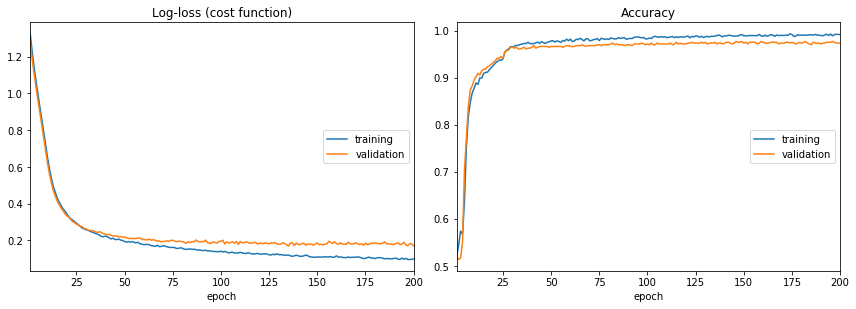

Log-loss (cost function):
training   (min:    0.096, max:    1.324, cur:    0.100)
validation (min:    0.169, max:    1.278, cur:    0.169)

Accuracy:
training   (min:    0.520, max:    0.993, cur:    0.992)
validation (min:    0.513, max:    0.977, cur:    0.973)
Train score: 0.08067828793169926
Train accuracy: 0.9975501113585746
Validation score: 0.1692673091688683
Validation accuracy: 0.9732620320855615


In [69]:
inputs = Input(shape=(300,))
hidden1 = Dense(128, activation="relu", kernel_regularizer=l1(0.0003))(inputs)
dropout_1 = Dropout(0.3)(hidden1)
hidden2 = Dense(64, activation="relu")(dropout_1)
preds = Dense(1, activation="sigmoid")(hidden2)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=None, epochs=200, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

In [70]:
y = load_file("../Samples/Guitar/Riffs/Guitar_noamp_riff5_10.mp3", 8000)

In [71]:
results = apply_window(y, size=300, disp=100, function=model.predict, convert=True)

In [72]:
results = np.array(results)

In [73]:
final = []
for x in results:
    final.append([x[0], x[1][0][0]])
final = np.array(final)

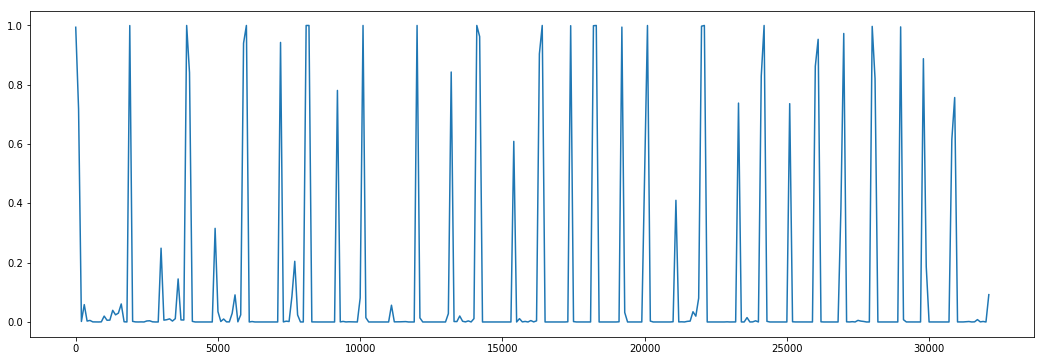

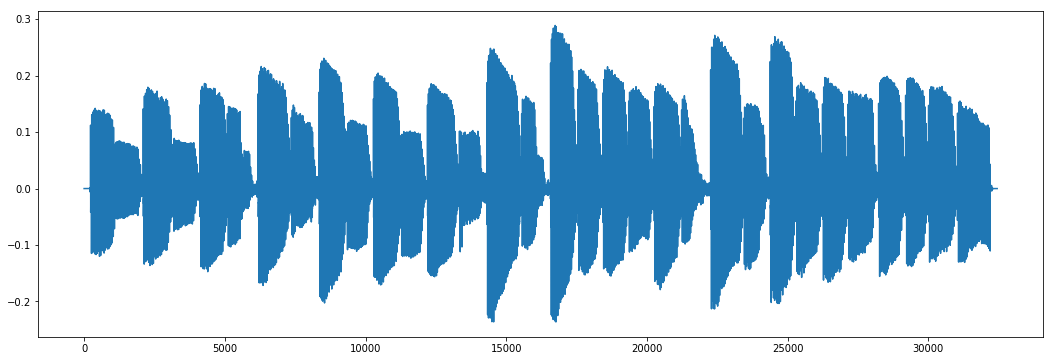

In [74]:
plt.figure(figsize=(18,6))
plt.plot(final[:,0], final[:,1])
plt.figure(figsize=(18,6))
plt.plot(y)

## XL Data

In [17]:
data = pd.read_pickle("../Data/Guitar/temp.pkl")

In [18]:
data.shape

(5996375, 201)

In [19]:
data_ = pd.read_pickle("../Data/Guitar/temp2.pkl")

In [20]:
data = data.append(data_)

In [21]:
data.shape

(6286916, 201)

In [22]:
data.head()

,Onset,x0,x1,x10,x100,x101,x102,x103,x104,x105,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1,6.945368e-11,-1.051609e-10,1.336038e-10,-3.205574e-05,-5.435983e-05,-3.958878e-07,-4.503499e-07,0.000014,-0.000007,...,-3.878044e-05,-0.000009,-3.084341e-05,-0.000014,-1.147940e-05,1.440708e-06,4.620567e-08,-2.635138e-05,-2.552828e-05,1.164346e-06
1,1,1.492790e-10,-1.997504e-10,-3.703868e-10,-3.958878e-07,-4.503499e-07,1.431608e-05,-6.642776e-06,-0.000019,0.000007,...,-3.084341e-05,-0.000014,-1.147940e-05,0.000001,4.620567e-08,-2.635138e-05,-2.552828e-05,1.164346e-06,-3.205574e-05,-5.435983e-05
2,1,2.528113e-10,-3.035270e-10,-1.197736e-09,1.431608e-05,-6.642776e-06,-1.898237e-05,7.477337e-06,0.000042,0.000014,...,-1.147940e-05,0.000001,4.620567e-08,-0.000026,-2.552828e-05,1.164346e-06,-3.205574e-05,-5.435983e-05,-3.958878e-07,-4.503499e-07
3,1,3.412894e-10,-3.564821e-10,-2.226117e-09,-1.898237e-05,7.477337e-06,4.232486e-05,1.396539e-05,0.000008,0.000044,...,4.620567e-08,-0.000026,-2.552828e-05,0.000001,-3.205574e-05,-5.435983e-05,-3.958878e-07,-4.503499e-07,1.431608e-05,-6.642776e-06
4,1,3.358236e-10,-2.683475e-10,-3.084448e-09,4.232486e-05,1.396539e-05,7.978076e-06,4.368255e-05,-0.000007,-0.000031,...,-2.552828e-05,0.000001,-3.205574e-05,-0.000054,-3.958878e-07,-4.503499e-07,1.431608e-05,-6.642776e-06,-1.898237e-05,7.477337e-06


In [ ]:
data.index = data.index.reindex([_ for _ in range(data.shape[0])])[0]

Shuffle rows

In [ ]:
data = data.sample(frac=1)

In [ ]:
data = data.drop([_ for _ in range(int(data.shape[0]/2))])

In [3]:
data = pd.read_pickle("../Data/Guitar/temp-sample.pkl")

In [4]:
data.shape

(3143458, 201)

In [6]:
data.index = data.index.reindex([_ for _ in range(data.shape[0])])[0]

In [4]:
data = data.drop(data[data["Onset"] == 0].sample(2200000).index)

In [7]:
data = data.drop([_ for _ in range(data.shape[0]-50000)])

In [8]:
data.shape

(50000, 201)

In [5]:
data[data["Onset"] == 1].shape[0]/data.shape[0]

0.46946127967540685

In [9]:
%run ../Utilities/Utilities.ipynb

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Onset")

In [8]:
inputs = Input(shape=(300,))
hidden1 = Dense(128)(inputs)
hidden2 = Dense(64, activation="relu")(hidden1)
preds = Dense(1, activation="sigmoid")(hidden2)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=None, epochs=50, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

Instructions for updating:
Use tf.cast instead.


KeyboardInterrupt: 

In [62]:
score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

Train score: 0.38875600481033323
Train accuracy: 0.86875
Validation score: 0.3485904459953308
Validation accuracy: 0.8900000009536743


In [17]:
model.save_weights('Guitar_onset_NN_weights.h5')

In [18]:
with open('Guitar_onset_NN_architecture.json', 'w') as f:
    f.write(model.to_json())